In [50]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [51]:
model=tf.keras.models.load_model('/Users/withmocha/Desktop/VisualStudioCode/Capstone Design project/sentence base/model/LSTM/saved_model/voicefishing_anomaly_detection_classifier_model99.6.h5')

2024-04-05 16:54:20.027121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-05 16:54:20.028840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-05 16:54:20.029325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 384, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 384, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 201,801
Trainable params: 201,801
Non-trainable params: 0
__________________________________________________

In [118]:
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/sentenceTransformer_vetorized.csv")
data_row.drop(columns=['Unnamed: 0'],inplace=True)
data_row.drop(columns=['predict'],inplace=True)
x_train=pd.DataFrame(data_row)

In [119]:
import pandas as pd

x_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/x_test.csv")
y_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/other/y_test.csv")

x_test.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [120]:
y_test

,predict
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test set에는 transform만 사용하기

In [122]:
x_test.shape

(500, 384)

In [123]:
x_test = tf.cast(x_test, tf.float32)

In [124]:
x_test = tf.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [125]:
x_test

<tf.Tensor: shape=(500, 384, 1), dtype=float32, numpy=
array([[[0.6892319 ],
        [0.36294976],
        [0.6079691 ],
        ...,
        [0.38962364],
        [0.5902495 ],
        [0.57835597]],

       [[0.66638005],
        [0.44281447],
        [0.499844  ],
        ...,
        [0.47871447],
        [0.33750746],
        [0.56224054]],

       [[0.5303241 ],
        [0.46591383],
        [0.70120794],
        ...,
        [0.5112138 ],
        [0.4920013 ],
        [0.5667965 ]],

       ...,

       [[0.61993676],
        [0.39750797],
        [0.5751135 ],
        ...,
        [0.4552074 ],
        [0.45842278],
        [0.4654789 ]],

       [[0.49388215],
        [0.46675885],
        [0.59619236],
        ...,
        [0.5064777 ],
        [0.52672225],
        [0.49897832]],

       [[0.6443358 ],
        [0.3458393 ],
        [0.633872  ],
        ...,
        [0.59749067],
        [0.35411078],
        [0.56914645]]], dtype=float32)>

In [126]:
pred = model.predict(x_test)

16/16 [==============================] - 1s 89ms/step


In [127]:
pred

array([[2.61495916e-06],
       [3.92633006e-02],
       [1.41547903e-01],
       [9.78916407e-01],
       [1.44215246e-05],
       [2.39103269e-02],
       [1.37601717e-06],
       [2.43544364e-05],
       [1.92944426e-03],
       [4.00921749e-03],
       [6.31102128e-04],
       [2.58064756e-05],
       [4.91730054e-04],
       [1.43248515e-04],
       [9.75398347e-04],
       [3.70510155e-03],
       [2.09083532e-06],
       [7.37862422e-07],
       [5.95491869e-08],
       [1.32595212e-03],
       [4.56352536e-05],
       [5.95676072e-04],
       [2.90087308e-03],
       [1.28968807e-07],
       [1.53468573e-04],
       [4.53845627e-04],
       [6.05294764e-01],
       [1.05614692e-03],
       [5.45272324e-03],
       [2.09207774e-05],
       [9.57690835e-01],
       [1.82152857e-04],
       [1.78627488e-06],
       [5.94066696e-05],
       [8.09397176e-03],
       [9.44163330e-05],
       [6.65946340e-04],
       [6.38449501e-06],
       [3.88480519e-04],
       [2.51029531e-04],


In [128]:
precisions, recalls,thresholds = precision_recall_curve(y_test,pred)

In [129]:
precisions

array([0.794     , 0.79358717, 0.79518072, 0.79678068, 0.7983871 ,
       0.7979798 , 0.79757085, 0.79918864, 0.79878049, 0.79837067,
       0.8       , 0.799591  , 0.79918033, 0.79835391, 0.79793814,
       0.79958678, 0.79917184, 0.79875519, 0.7983368 , 0.79791667,
       0.79958246, 0.80125523, 0.80293501, 0.80252101, 0.80168776,
       0.8012685 , 0.80084746, 0.80254777, 0.80212766, 0.80383795,
       0.80555556, 0.80513919, 0.80472103, 0.80430108, 0.80387931,
       0.80561555, 0.80519481, 0.80477223, 0.80434783, 0.80392157,
       0.80567686, 0.80482456, 0.8043956 , 0.8061674 , 0.80573951,
       0.80530973, 0.80444444, 0.80400891, 0.80357143, 0.80313199,
       0.80224719, 0.80405405, 0.80586907, 0.80769231, 0.80725624,
       0.80909091, 0.80865604, 0.80778032, 0.80963303, 0.8091954 ,
       0.80875576, 0.80831409, 0.80787037, 0.80974478, 0.80930233,
       0.81118881, 0.81030445, 0.80985915, 0.81176471, 0.81132075,
       0.8108747 , 0.81279621, 0.81235154, 0.81428571, 0.81339

In [130]:
recalls

array([1.        , 0.99748111, 0.99748111, 0.99748111, 0.99748111,
       0.99496222, 0.99244332, 0.99244332, 0.98992443, 0.98740554,
       0.98740554, 0.98488665, 0.98236776, 0.97732997, 0.97481108,
       0.97481108, 0.97229219, 0.9697733 , 0.96725441, 0.96473552,
       0.96473552, 0.96473552, 0.96473552, 0.96221662, 0.95717884,
       0.95465995, 0.95214106, 0.95214106, 0.94962217, 0.94962217,
       0.94962217, 0.94710327, 0.94458438, 0.94206549, 0.9395466 ,
       0.9395466 , 0.93702771, 0.93450882, 0.93198992, 0.92947103,
       0.92947103, 0.92443325, 0.92191436, 0.92191436, 0.91939547,
       0.91687657, 0.91183879, 0.9093199 , 0.90680101, 0.90428212,
       0.89924433, 0.89924433, 0.89924433, 0.89924433, 0.89672544,
       0.89672544, 0.89420655, 0.88916877, 0.88916877, 0.88664987,
       0.88413098, 0.88161209, 0.8790932 , 0.8790932 , 0.87657431,
       0.87657431, 0.87153652, 0.86901763, 0.86901763, 0.86649874,
       0.86397985, 0.86397985, 0.86146096, 0.86146096, 0.85642

In [131]:
print(len(precisions))
print(len(recalls))

464
464


In [132]:
for i in range(len(precisions)):
    if recalls[i]<=precisions[i]:
        thresholds_fit=thresholds[i]
        break
    
print(i)

92
5.340478e-06


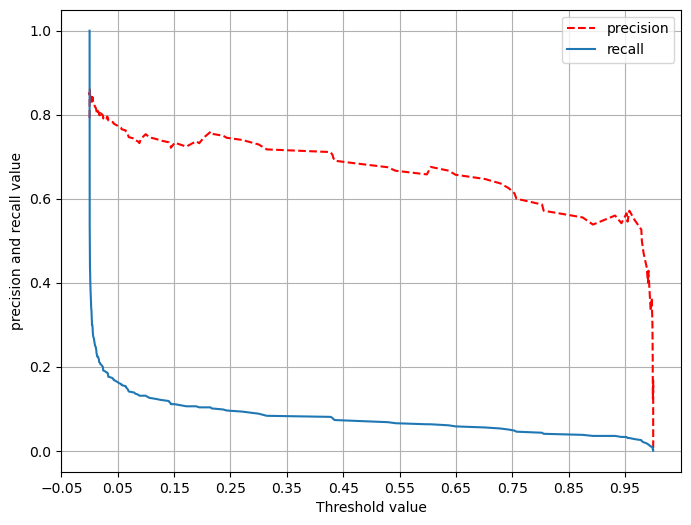

In [133]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test,pred):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred)
    
    plt.figure(figsize=(8,6))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred)

In [134]:
y_pred=pred.reshape(-1)
y_pred

array([2.61495916e-06, 3.92633006e-02, 1.41547903e-01, 9.78916407e-01,
       1.44215246e-05, 2.39103269e-02, 1.37601717e-06, 2.43544364e-05,
       1.92944426e-03, 4.00921749e-03, 6.31102128e-04, 2.58064756e-05,
       4.91730054e-04, 1.43248515e-04, 9.75398347e-04, 3.70510155e-03,
       2.09083532e-06, 7.37862422e-07, 5.95491869e-08, 1.32595212e-03,
       4.56352536e-05, 5.95676072e-04, 2.90087308e-03, 1.28968807e-07,
       1.53468573e-04, 4.53845627e-04, 6.05294764e-01, 1.05614692e-03,
       5.45272324e-03, 2.09207774e-05, 9.57690835e-01, 1.82152857e-04,
       1.78627488e-06, 5.94066696e-05, 8.09397176e-03, 9.44163330e-05,
       6.65946340e-04, 6.38449501e-06, 3.88480519e-04, 2.51029531e-04,
       3.92437621e-04, 1.09686571e-05, 4.23939247e-03, 6.49099350e-01,
       4.83977282e-03, 3.74775217e-03, 5.62438853e-02, 5.76627115e-03,
       4.18432537e-05, 9.95217852e-05, 8.35711853e-06, 5.15311367e-05,
       7.46199476e-06, 6.42975749e-07, 8.05582881e-01, 1.03561035e-06,
      

In [135]:
print(thresholds)

5.340478e-06


In [136]:
y_pred=pred.reshape(-1)
threshold = thresholds
pred = (y_pred >= threshold)

In [137]:
pred

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [138]:
import numpy as np

y_test=np.array(y_test['predict'])

In [139]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [140]:
from sklearn.metrics import accuracy_score

accuracy_test= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.716
